<a href="https://colab.research.google.com/github/marcoantonioaragon/aragon-marco/blob/bootstrap/bias_check_resampling_bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.Importações

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.utils import resample
import matplotlib.patches as mpatches

# 1. Geração de amostra aleatória

## 1.1 Amostra aleatória

In [ ]:
total_rows = 5000
user_id_range = range(1, 10001)
test_groups = ["A", "B", "C"]
conversion_probabilities = [0.2, 0.3, 0.5]  # Certifique-se que a soma é 1

data = pd.DataFrame(columns=['user_id', 'test_group', 'converted'])
data['user_id'] = np.random.choice(user_id_range, size=total_rows)
data['test_group'] = np.random.choice(test_groups, size=total_rows, p=conversion_probabilities)

# Gere valores de conversão
for i in range(total_rows):
    if data['test_group'].iloc[i] == "A":
        data.loc[i, 'converted'] = np.random.choice([0, 1], p=[1 - conversion_probabilities[0], conversion_probabilities[0]])
    elif data['test_group'].iloc[i] == "B":
        data.loc[i, 'converted'] = np.random.choice([0, 1], p=[1 - conversion_probabilities[1], conversion_probabilities[1]])
    else:
        data.loc[i, 'converted'] = np.random.choice([0, 1], p=[1 - conversion_probabilities[2], conversion_probabilities[2]])

In [ ]:
data.head()

,user_id,test_group,converted
0,822,B,1
1,5980,C,0
2,7608,C,0
3,3259,C,1
4,7477,A,0


## 1.1 Verificação dos dados da amostra aleatória

In [ ]:
data['user_id'] = data['user_id'].astype(str)
data['converted'] = data['converted'].astype(int)

In [ ]:
data.dtypes

user_id       object
test_group    object
converted      int64
dtype: object

In [ ]:
data.test_group.value_counts()

test_group
C    2452
B    1565
A     983
Name: count, dtype: int64

In [ ]:
data.user_id.nunique()

3915

In [ ]:
data.user_id.shape[0]

5000

In [ ]:
data.groupby('test_group')['user_id'].nunique()

test_group
A     940
B    1453
C    2180
Name: user_id, dtype: int64

In [ ]:
data.groupby('test_group')['converted'].sum()

test_group
A     192
B     465
C    1234
Name: converted, dtype: int64

In [ ]:
data.groupby('test_group')['converted'].mean()

test_group
A    0.195320
B    0.297125
C    0.503263
Name: converted, dtype: float64

In [ ]:
data.groupby('test_group').agg({'user_id': 'nunique', 'converted': 'sum'})

,user_id,converted
test_group,,
A,940,192
B,1453,465
C,2180,1234


# 2. Reamostragem bootstrap

In [ ]:
# Parâmetro de interesse para reamostrar
parametro = data['converted'].mean()

In [ ]:
# Número de repetições de bootstrap
reps = 1000

In [ ]:
# Realize a reamostragem bootstrap (utilizando scikit-learn)
bootstrap_means = []
for _ in range(reps):
    # Crie uma nova amostra por reamostragem com reposição
    resample_data = resample(data)  # Utilizando resample do scikit-learn
    # Calcule o parâmetro na amostra bootstrap
    bootstrap_mean = resample_data['converted'].mean()
    bootstrap_means.append(bootstrap_mean)

In [ ]:
resample_data.head()

,user_id,test_group,converted
3820,279,B,0
3024,4855,A,0
492,6840,A,1
2204,1156,C,1
4325,313,C,1


In [ ]:
resample_data.head()

In [ ]:
resample_data.dtypes

user_id       object
test_group    object
converted      int64
dtype: object

In [ ]:
resample_data['user_id'] = resample_data['user_id'].astype(str)
resample_data['converted'] = resample_data['converted'].astype(int)

In [ ]:
resample_data.groupby('test_group')['converted'].mean()

test_group
A    0.225579
B    0.320395
C    0.487736
Name: converted, dtype: float64

In [ ]:
resample_data.groupby('test_group').agg({'user_id': 'nunique', 'converted': 'sum'})

,user_id,converted
test_group,,
A,617,224
B,908,487
C,1459,1213


In [ ]:
data.groupby('test_group')['converted'].mean()

test_group
A    0.224429
B    0.318063
C    0.503043
Name: converted, dtype: object

In [ ]:
data.groupby('test_group').agg({'user_id': 'nunique', 'converted': 'sum'})

,user_id,converted
test_group,,
A,963,226
B,1397,486
C,2199,1240


# 3. Distribuições de probabilidade

## 3.1 Distribuição amostra original

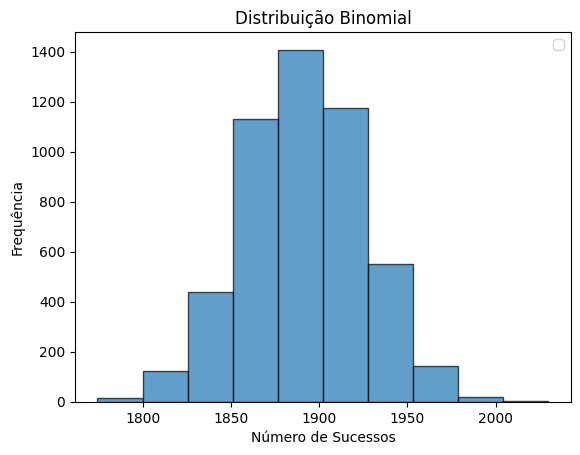

In [ ]:
# Calcule as probabilidades binomiais
n_total = len(dados)
p = data['converted'].mean()
probabilidades_binomial = np.random.binomial(n=n_total, p=p, size=n_total)
dados['probabilidades_binomial'] = probabilidades_binomial

# Crie o gráfico de distribuição binomial
plt.hist(data['probabilidades_binomial'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribuição Binomial')
plt.xlabel('Número de Sucessos')
plt.ylabel('Frequência')
plt.legend()
plt.show()

## 3.2 Distribuição reamostra bootstrap

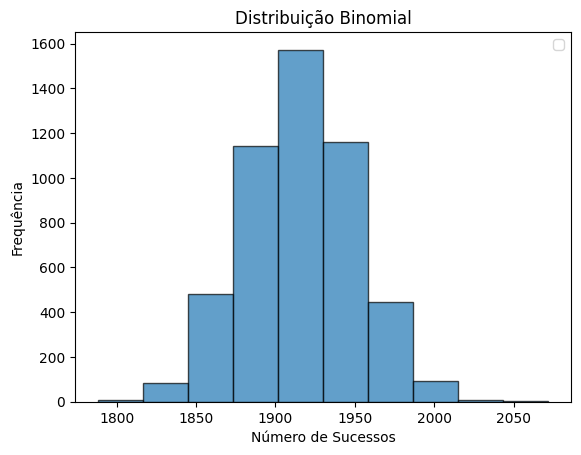

In [ ]:
# Calcule as probabilidades binomiais
n_total = len(resample_data)
p = resample_data['converted'].mean()
probabilidades_binomial = np.random.binomial(n=n_total, p=p, size=n_total)
resample_data['probabilidades_binomial'] = probabilidades_binomial

# Crie o gráfico de distribuição binomial
plt.hist(resample_data['probabilidades_binomial'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribuição Binomial')
plt.xlabel('Número de Sucessos')
plt.ylabel('Frequência')
plt.legend()
plt.show()

## 3.3 Distribuições sobrepostas

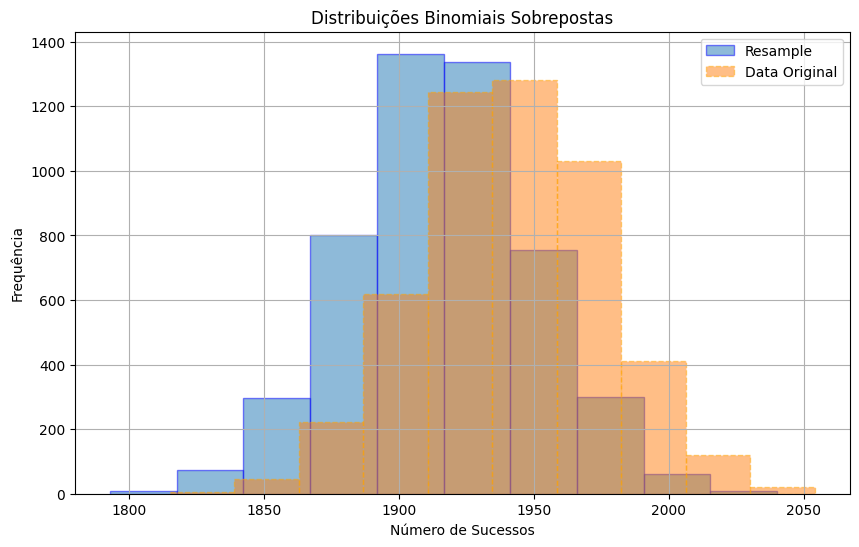

In [ ]:
# Calcule as probabilidades binomiais
n_total = len(data)
p = data['converted'].mean()
probabilidades_binomial = np.random.binomial(n=n_total, p=p, size=n_total)
data['probabilidades_binomial'] = probabilidades_binomial

# Calcule as probabilidades binomiais
n_total = len(resample_data)
p = resample_data['converted'].mean()
probabilidades_binomial = np.random.binomial(n=n_total, p=p, size=n_total)
resample_data['probabilidades_binomial'] = probabilidades_binomial

# Defina cores e estilos de linha
cor_resample = 'blue'
estilo_linha_resample = 'solid'

cor_data = 'orange'
estilo_linha_data = 'dashed'

# Crie o gráfico
plt.figure(figsize=(10, 6))  # Ajuste o tamanho do gráfico se necessário

# Distribuição resample_data
plt.hist(resample_data['probabilidades_binomial'], bins=10, edgecolor=cor_resample,
         alpha=0.5, label='Resample', linestyle=estilo_linha_resample)

# Distribuição data
plt.hist(data['probabilidades_binomial'], bins=10, edgecolor=cor_data,
         alpha=0.5, label='Data Original', linestyle=estilo_linha_data)

# Personalizar o gráfico
plt.xlabel('Número de Sucessos')
plt.ylabel('Frequência')
plt.title('Distribuições Binomiais Sobrepostas')
plt.legend()
plt.grid(True)  # Adicione linhas de grade para facilitar a comparação
plt.show()

# 4. Análises de viés

In [ ]:
#Parâmetro da amostra original
parametro

0.3904

In [ ]:
#Parâmetro da reamostra
np.mean(bootstrap_means)

0.3902248

In [ ]:
#Variância da amostra original
data['converted'].var()

0.23803544708941785

In [ ]:
#Variância da reamostra
np.var(bootstrap_means)

4.7281544959999995e-05

In [ ]:
# Calcule o viés de estimação e seleção
bias_estimation = parametro - np.mean(bootstrap_means)
bias_selection = data['converted'].var() - np.var(bootstrap_means)

# Imprima o viés de estimação e seleção
print('Viés de Estimação:', bias_estimation)
print('Viés de Seleção:', bias_selection)

Viés de Estimação: 0.000175200000000042
Viés de Seleção: 0.23798816554445784


# 5. Resultados

## 5.1 Viés de estimação

Viés de Estimação (0.000175):

Valor Baixo: O viés de estimação é muito baixo (próximo de zero), indicando que o estimador original (data['converted'].mean()) é imparcial em relação ao parâmetro verdadeiro da população. Isso significa que, em média, o estimador original tende a fornecer uma boa aproximação do valor real do parâmetro.<span>

Interpretação Positiva: Esse resultado é positivo, pois indica que o método de reamostragem bootstrap não está introduzindo um viés significativo na estimativa do parâmetro.

## 5.2 Viés de seleção

Viés de Seleção (0.237988):

Valor Moderado: O viés de seleção apresenta um valor moderado (0.24), o que sugere que existe certa discrepância entre a variância da população e a variância das amostras reamostradas. Isso pode indicar que o estimador original (data['converted'].var()) não é totalmente imparcial em relação à variância real da população.<span>

Possíveis Causas: O viés de seleção pode ser causado por diversos fatores, como a natureza dos dados, o tamanho da amostra original ou o método de reamostragem utilizado.<span>

Interpretação Neutra: A interpretação deste valor depende do contexto do problema e do nível de precisão desejado. Em alguns casos, um viés de seleção moderado pode ser aceitável, enquanto em outros, pode ser necessário tomar medidas para mitigá-lo.

## 5.3 Teste de hipótese

In [ ]:
from scipy.stats import chi2_contingency

# Contagem de sucessos e falhas na amostra original
n_original_success = data['converted'].sum()
n_original_failure = len(data) - n_original_success

# Contagem média de sucessos e falhas nas amostras reamostradas
n_bootstrap_success = np.mean(resample_data['converted'].sum())
n_bootstrap_failure = len(resample_data) - n_bootstrap_success

# Tabela de contagem (2x2)
contingency_table = np.array([[n_original_success, n_original_failure],
                              [n_bootstrap_success, n_bootstrap_failure]])

# Teste qui-quadrado
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Interpretação
if p_value < 0.05:
    print("Existe diferença estatisticamente significativa entre as amostras para o parâmetro de interesse.")
else:
    print("Não existe diferença estatisticamente significativa entre as amostras para o parâmetro de interese.")

Não existe diferença estatisticamente significativa entre as amostras para o parâmetro de interese.
